In [2]:
source('/nfs/turbo/umms-cgillies/cgillies/RACE_CAPS/stringer-race-caps/sparsity_analysis/run_2_stage_util.R')
require(tidyverse)
require(rstan)
require(ggplot2)
require(R.matlab)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: rstan

Loading required package: StanHeaders

rstan (Version 2.19.3, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


Attaching package: ‘rstan’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: R.matlab

R.matlab v3.6.2 (2018-09-26) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R

In [3]:
dir = '/nfs/turbo/umms-cgillies/cgillies/RACE_CAPS/analysis/20200315_2_stage_impute_beta_no_missing/'
rstan_options(auto_write = TRUE)
stage_1_impute_code_file = paste0(dir, 'stage_1_impute.stan')
stage_1_impute_model = stan_model(file = stage_1_impute_code_file, verbose = FALSE)

stage_2_regress_code_file = paste0(dir, 'stage_2_regress.stan' )
stage_2_regress_model = stan_model(file = stage_2_regress_code_file, verbose = FALSE)

#df_nmr = read_csv('/nfs/turbo/umms-cgillies/cgillies/RACE_CAPS/11_20_2019_even_odds_interaction_prior_1/nmr_metabolites_scaled_matrix.csv')

DIAGNOSTIC(S) FROM PARSER:
Info:
Left-hand side of sampling statement (~) may contain a non-linear transform of a parameter or local variable.
If it does, you need to include a target += statement with the log absolute determinant of the Jacobian of the transform.
Left-hand-side of sampling statement:
    x_impute ~ normal(...)



In [3]:
stage_1_impute_code_file

[1] "/nfs/turbo/umms-cgillies/cgillies/RACE_CAPS/analysis/20200315_2_stage_impute_beta_no_missing/stage_1_impute.stan"

# NMR

In [4]:
df_nmr_raw = read_csv('/nfs/turbo/umms-cgillies/cgillies/RACE_CAPS/data/20200227_teddy_jenanaro/raw_nmr.csv')
dim(df_nmr_raw)
df_demo = read_csv('/nfs/turbo/umms-cgillies/cgillies/RACE_CAPS/data/20200227_teddy_jenanaro/RACE_Demographics.csv')
dim(df_demo)


Parsed with column specification:
cols(
  .default = col_double(),
  t0nmronly = col_character()
)

See spec(...) for full column specifications.



[1] 228  29

Parsed with column specification:
cols(
  .default = col_double(),
  carntx = col_character(),
  X28DaySurvival = col_character(),
  X1YearSurvival = col_character(),
  Sex = col_character(),
  Race = col_character(),
  Ethnicity = col_character(),
  mITT.included = col_character(),
  PP.included = col_character(),
  T0.Blood.drawn.after.L.carnitine.started. = col_character(),
  Infusion.Stopped.Early. = col_character(),
  Hours.from.infusion.complete.to.T24.blood.draw = col_character(),
  Hours.from.infusion.complete.to.T48.blood.draw = col_character(),
  Empiric.date.correction.needed.for.likely.data.entry.error = col_character()
)

See spec(...) for full column specifications.



[1] 250  35

In [5]:
colnames(df_demo)
print(' ')
colnames(df_nmr_raw)

[1] "studyid"                                                   
 [2] "dose"                                                      
 [3] "carntx"                                                    
 [4] "survivaldays"                                              
 [5] "FinalDeath"                                                
 [6] "X28DayMortality"                                           
 [7] "X28DaySurvival"                                            
 [8] "X1YearMortality"                                           
 [9] "X1YearSurvival"                                            
[10] "weight_kg"                                                 
[11] "weight_lbs"                                                
[12] "height_cm"                                                 
[13] "height_in"                                                 
[14] "BMI"                                                       
[15] "Age"                                                       
[16] "Sex"                                                       
[17] "Race"                                                      
[18] "Ethnicity"                                                 
[19] "mITT.included"                                             
[20] "PP.included"                                               
[21] "T0.Blood.drawn.after.L.carnitine.started."                 
[22] "Infusion.Stopped.Early."                                   
[23] "Hours.from.infusion.complete.to.T24.blood.draw"            
[24] "Hours.from.infusion.complete.to.T48.blood.draw"            
[25] "Empiric.date.correction.needed.for.likely.data.entry.error"
[26] "T0renal"                                                   
[27] "T12renal"                                                  
[28] "T24renal"                                                  
[29] "T48renal"                                                  
[30] "Calculated.T0.SOFA.Value"                                  
[31] "Calculated.T12.SOFA.Value"                                 
[32] "Calculated.T24.SOFA.Value"                                 
[33] "Calculated.T48.SOFA.Value"                                 
[34] "DNR.within.24.hours"                                       
[35] "Withdrawal.within.24.hours"

[1] " "


[1] "studyid"          "t0nmronly"        "hydroxybutyrate"  "oxoisocaproate"  
 [5] "3-hydoxybutyrate" "alanine"          "betaine"          "carnitine"       
 [9] "choline"          "citrate"          "creatine"         "creatinine"      
[13] "glucose"          "glutamine"        "glycine"          "histidine"       
[17] "isoleucine"       "lactate"          "leucine"          "lysine"          
[21] "methionine"       "oacetylcarnitine" "ornithine"        "phenylalanine"   
[25] "proline"          "propyleneglycol"  "pyruvate"         "tyrosine"        
[29] "valine"

In [6]:
df_nmr_raw_res = df_nmr_raw %>% left_join( df_demo %>% select( studyid,survivaldays ), by = 'studyid') %>%
    mutate(died_90_day = as.numeric(survivaldays <= 90)) %>% select(-c(studyid,t0nmronly,survivaldays))

In [7]:
colnames(df_nmr_raw_res)
length(colnames(df_nmr_raw_res))
metabolites = colnames(df_nmr_raw_res)[1:27]
df_censored = data.frame( scale( log( df_nmr_raw_res[,metabolites]) ) )
df_censored %>% head()
metabolites_df = colnames(df_censored)[1:27]
df_censored_with_y = df_censored
df_censored_with_y$died_90_day = df_nmr_raw_res$died_90_day

[1] "hydroxybutyrate"  "oxoisocaproate"   "3-hydoxybutyrate" "alanine"         
 [5] "betaine"          "carnitine"        "choline"          "citrate"         
 [9] "creatine"         "creatinine"       "glucose"          "glutamine"       
[13] "glycine"          "histidine"        "isoleucine"       "lactate"         
[17] "leucine"          "lysine"           "methionine"       "oacetylcarnitine"
[21] "ornithine"        "phenylalanine"    "proline"          "propyleneglycol" 
[25] "pyruvate"         "tyrosine"         "valine"           "died_90_day"

[1] 28

,hydroxybutyrate,oxoisocaproate,X3.hydoxybutyrate,alanine,betaine,carnitine,choline,citrate,creatine,creatinine,⋯,lysine,methionine,oacetylcarnitine,ornithine,phenylalanine,proline,propyleneglycol,pyruvate,tyrosine,valine
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.11058681,NA,-0.1436373,0.02502320,1.9288487,-0.41632118,-0.28201509,-0.9004226,1.21811975,0.70514611,⋯,-0.8745736,-1.151234765,0.2889639,NA,-0.2435691,1.0326661,0.2499441,1.4324329,-0.9850502,-0.2923139
2,0.20567458,NA,0.5234356,-0.06681863,2.9357468,-0.14689327,NA,1.2828014,-0.78666949,0.96433806,⋯,0.4605616,-0.008818703,1.3654234,-1.384977,-1.0091525,0.6655693,0.9600813,1.0936245,-1.5353914,-2.5862771
3,-0.86954374,NA,0.1132976,1.05087951,0.7769999,-0.03579198,-0.68398413,-0.2262385,-1.46323503,0.05106906,⋯,-0.0487658,0.333149507,-0.7754946,1.018090,0.5284711,0.6859273,-1.2238123,0.7141551,0.2284384,-0.5491362
4,-1.65788538,NA,-0.1146208,-0.71484866,0.5039832,0.75804647,-0.00940278,-0.9191003,2.07469597,-0.05458034,⋯,-0.6965162,-0.114108455,0.6695714,0.850243,0.3636056,-0.8076736,1.1414521,-1.1657903,-1.0595186,-1.5321084
5,0.05502393,0.1489877,-0.8084151,-1.40865371,-1.2071682,-0.47905574,-0.08497919,-0.1895307,-0.24156682,0.35065189,⋯,NA,NA,-1.1418326,-2.452548,-1.0304027,NA,-0.6086965,-1.0680180,NA,-0.9112407
6,0.06575278,-0.3651820,1.2426891,1.00814503,1.0614360,-0.75605215,2.06888650,1.2622908,0.01965866,-0.11498146,⋯,0.0977059,-0.223193907,-0.2660813,1.070979,0.2499783,-0.6224023,1.7586352,1.0902504,0.6307422,-0.2407793


In [9]:
df_censored_with_y %>% dim

[1] 228  28

In [217]:
class(df_censored_with_y)

[1] "data.frame"

In [222]:
bayes_res = run_bayes_model(df_censored = df_censored_with_y, metabolites = metabolites_df)

[1] "CONTROL"
$adapt_delta
[1] 0.8

$max_treedepth
[1] 10

[1] "IMPUTING"
[1] 266


In [223]:
stage_1_impute_data = stage_1_impute_make_data(x_censored = df_censored, y = df_censored_with_y$died_90_day )
names(stage_1_impute_data)


[1] "N"                  "N_miss"             "N_var"             
 [4] "x_raw"              "x_naive_impute"     "N_use_impute"      
 [7] "x_use_impute"       "x_missing"          "x_missing_init"    
[10] "x_missing_init_raw" "x_is_missing"       "threshold"         
[13] "y"

In [224]:
names(bayes_res)
dim(metabolites_df)

[1] "sum_table"   "stage_1_fit" "stage_2_fit"

NULL

In [225]:
bayes_res_table = make_summary_table_beta( bayes_res$stage_2_fit, metabolites = metabolites_df )

In [226]:
bayes_res_table = bayes_res_table %>% mutate(SIG_BAYES=P_GT_LT_0 >= 0.975)
bayes_res_table

Metabolite,Param,mean,sd,X2.5.,X50.,X97.5.,Rhat,Z,P_GT_LT_0,SIG_BAYES
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
oacetylcarnitine,beta_x[20],0.67174323,0.14695164,0.39270075,0.66732290,0.9642254,0.9991854,4.5711856,1.00000,TRUE
tyrosine,beta_x[26],0.58412755,0.13850634,0.31863773,0.58123300,0.8667370,0.9995169,4.2173345,1.00000,TRUE
betaine,beta_x[5],0.59824230,0.14624369,0.32398497,0.59442026,0.9011620,0.9996255,4.0907222,1.00000,TRUE
propyleneglycol,beta_x[24],0.58284571,0.14300090,0.31398788,0.57838903,0.8780225,0.9992295,4.0758186,1.00000,TRUE
glycine,beta_x[13],0.51431593,0.13818825,0.23895358,0.51184529,0.7909574,0.9993084,3.7218500,1.00000,TRUE
lysine,beta_x[18],0.50407435,0.13546539,0.24569364,0.50337879,0.7759191,0.9991043,3.7210563,1.00000,TRUE
proline,beta_x[23],0.42845309,0.11592503,0.20500158,0.42665877,0.6565775,0.9992545,3.6959497,1.00000,TRUE
methionine,beta_x[19],0.37909728,0.10931005,0.16909844,0.37680169,0.6003337,1.0004020,3.4680916,1.00000,TRUE
lactate,beta_x[16],0.45690948,0.13564733,0.20462653,0.45359975,0.7365056,0.9994492,3.3683633,1.00000,TRUE


In [227]:
stage_2_posterior = extract(bayes_res$stage_2_fit)

In [228]:
names( stage_2_posterior )

[1] "x_impute_raw" "beta_x"       "alpha_x"      "sigma_beta_x" "nu_x"        
[6] "x_impute"     "lp__"

In [229]:
mean( stage_2_posterior$sigma_beta_x )
mean( stage_2_posterior$nu_x )

[1] 0.3983962

[1] 23.65931

In [230]:
df_nmr_raw_res$died_90_day

[1] 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0
 [38] 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0
 [75] 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1
[112] 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1
[149] 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0
[186] 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0
[223] 1 0 1 1 1 1

In [231]:
x_naive_impute = data.frame( stage_1_impute_data$x_naive_impute )
x_naive_impute_with_y = x_naive_impute
x_naive_impute_with_y$died_90_day = df_nmr_raw_res$died_90_day

In [84]:
#x_naive_impute_with_y$died_90_day

In [232]:
metabolites_df
logistic_res = sapply( metabolites_df, FUN=function(m) { apply_logistic_sim(m,x_naive_impute_with_y) } )

[1] "hydroxybutyrate"   "oxoisocaproate"    "X3.hydoxybutyrate"
 [4] "alanine"           "betaine"           "carnitine"        
 [7] "choline"           "citrate"           "creatine"         
[10] "creatinine"        "glucose"           "glutamine"        
[13] "glycine"           "histidine"         "isoleucine"       
[16] "lactate"           "leucine"           "lysine"           
[19] "methionine"        "oacetylcarnitine"  "ornithine"        
[22] "phenylalanine"     "proline"           "propyleneglycol"  
[25] "pyruvate"          "tyrosine"          "valine"

In [233]:
format_logistic_res = function(logistic_res, metabolites) {
    logistic_res_df = data.frame(t(logistic_res))
    logistic_res_df$Metabolite = metabolites
    colnames( logistic_res_df ) = c('Estimate','StdErr','Z','P-value','Metabolite')
    logistic_res_df = logistic_res_df %>% select(Metabolite,Estimate,StdErr,Z,`P-value`  )
    logistic_res_df = logistic_res_df %>% mutate(P.Bon = p.adjust(`P-value`,method = "bonferroni"  ),
                              P.BH=p.adjust(`P-value`,method = "BH") ) %>% arrange(-abs(Z)) %>%
                             mutate(SIG_BH = P.BH < 0.05, SIG_BON=P.Bon < 0.05, SIG.RAW= `P-value` < 0.05)
    logistic_res_df
}

In [234]:
logistic_res_df = format_logistic_res(logistic_res,metabolites_df)

In [281]:
merged_results = bayes_res_table %>% inner_join(logistic_res_df, by='Metabolite')
merged_results

Warning message:
“Column `Metabolite` joining factor and character vector, coercing into character vector”


Metabolite,Param,mean,sd,X2.5.,X50.,X97.5.,Rhat,Z.x,P_GT_LT_0,SIG_BAYES,Estimate,StdErr,Z.y,P-value,P.Bon,P.BH,SIG_BH,SIG_BON,SIG.RAW
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
oacetylcarnitine,beta_x[20],0.67174323,0.14695164,0.39270075,0.66732290,0.9642254,0.9991854,4.5711856,1.00000,TRUE,0.70611229,0.14991836,4.7099788,2.477425e-06,6.689048e-05,6.689048e-05,TRUE,TRUE,TRUE
tyrosine,beta_x[26],0.58412755,0.13850634,0.31863773,0.58123300,0.8667370,0.9995169,4.2173345,1.00000,TRUE,0.61762039,0.14248299,4.3346955,1.459620e-05,3.940974e-04,1.663743e-04,TRUE,TRUE,TRUE
betaine,beta_x[5],0.59824230,0.14624369,0.32398497,0.59442026,0.9011620,0.9996255,4.0907222,1.00000,TRUE,0.63372439,0.15024292,4.2179985,2.464804e-05,6.654972e-04,1.663743e-04,TRUE,TRUE,TRUE
propyleneglycol,beta_x[24],0.58284571,0.14300090,0.31398788,0.57838903,0.8780225,0.9992295,4.0758186,1.00000,TRUE,0.65802466,0.15588771,4.2211452,2.430643e-05,6.562735e-04,1.663743e-04,TRUE,TRUE,TRUE
glycine,beta_x[13],0.51431593,0.13818825,0.23895358,0.51184529,0.7909574,0.9993084,3.7218500,1.00000,TRUE,0.57548327,0.14692955,3.9167293,8.975845e-05,2.423478e-03,4.846956e-04,TRUE,TRUE,TRUE
lysine,beta_x[18],0.50407435,0.13546539,0.24569364,0.50337879,0.7759191,0.9991043,3.7210563,1.00000,TRUE,0.54716604,0.14331052,3.8180451,1.345133e-04,3.631860e-03,6.053100e-04,TRUE,TRUE,TRUE
proline,beta_x[23],0.42845309,0.11592503,0.20500158,0.42665877,0.6565775,0.9992545,3.6959497,1.00000,TRUE,0.39251178,0.11257236,3.4867510,4.889264e-04,1.320101e-02,1.361132e-03,TRUE,TRUE,TRUE
methionine,beta_x[19],0.37909728,0.10931005,0.16909844,0.37680169,0.6003337,1.0004020,3.4680916,1.00000,TRUE,0.36400073,0.10464133,3.4785561,5.041229e-04,1.361132e-02,1.361132e-03,TRUE,TRUE,TRUE
lactate,beta_x[16],0.45690948,0.13564733,0.20462653,0.45359975,0.7365056,0.9994492,3.3683633,1.00000,TRUE,0.51227870,0.14655255,3.4955290,4.731230e-04,1.277432e-02,1.361132e-03,TRUE,TRUE,TRUE


In [282]:
nmr_out_file = '/nfs/turbo/umms-cgillies/cgillies/RACE_CAPS/analysis/20200317_real_data_analysis/nmr_cmp.csv'
write_csv(merged_results, nmr_out_file)

## GC Data

In [10]:
#df_voc = read_csv(
#    '/nfs/turbo/umms-cgillies/cgillies/RACE_CAPS/data/20190827_ruchi_gc_data/HumanARDSConsolidatedData_full.csv',col_names=TRUE)

df_mat = df = R.matlab::readMat('/nfs/turbo/umms-cgillies/cgillies/RACE_CAPS/data/20190827_ruchi_gc_data/HumanARDSConsolidatedData_full.mat')

In [11]:
voc_data_matrix = df_mat$PeakArea
voc_data_matrix [ voc_data_matrix == 0 ] = NA
class(voc_data_matrix)
voc_ards = df_mat$species



[1] "matrix"

In [14]:
voc_data_matrix %>% dim

[1] 85 79

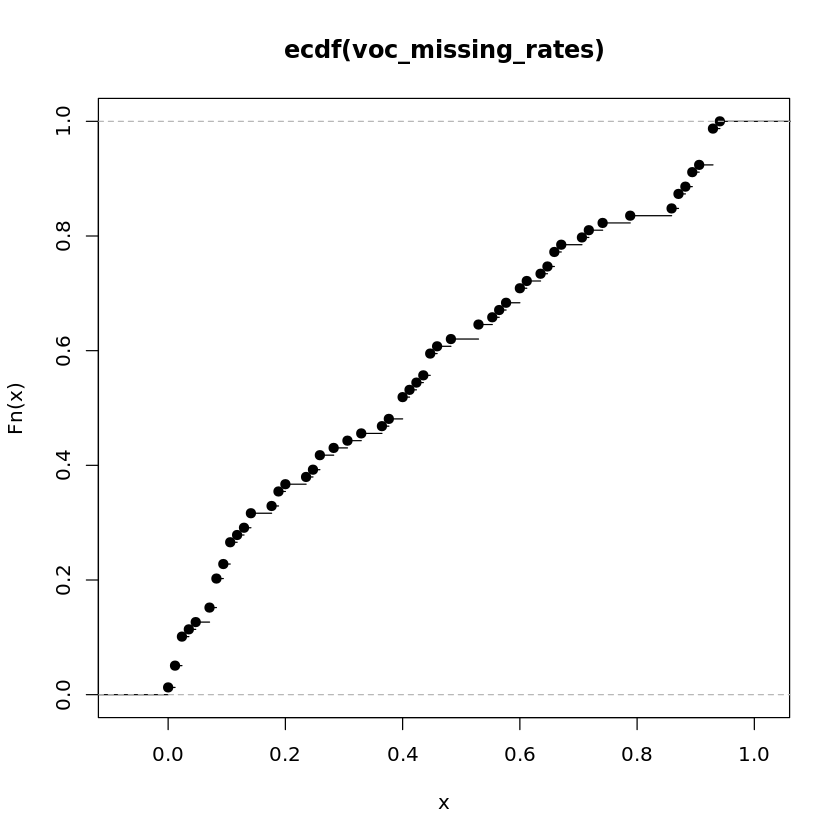

In [12]:
voc_missing_rates = data.frame(voc_data_matrix) %>% summarise_all(function(x) { mean(is.na(x)) })
voc_missing_rates = as.numeric(voc_missing_rates)
plot(ecdf(voc_missing_rates))


In [ ]:
hist(voc_data_matrix)

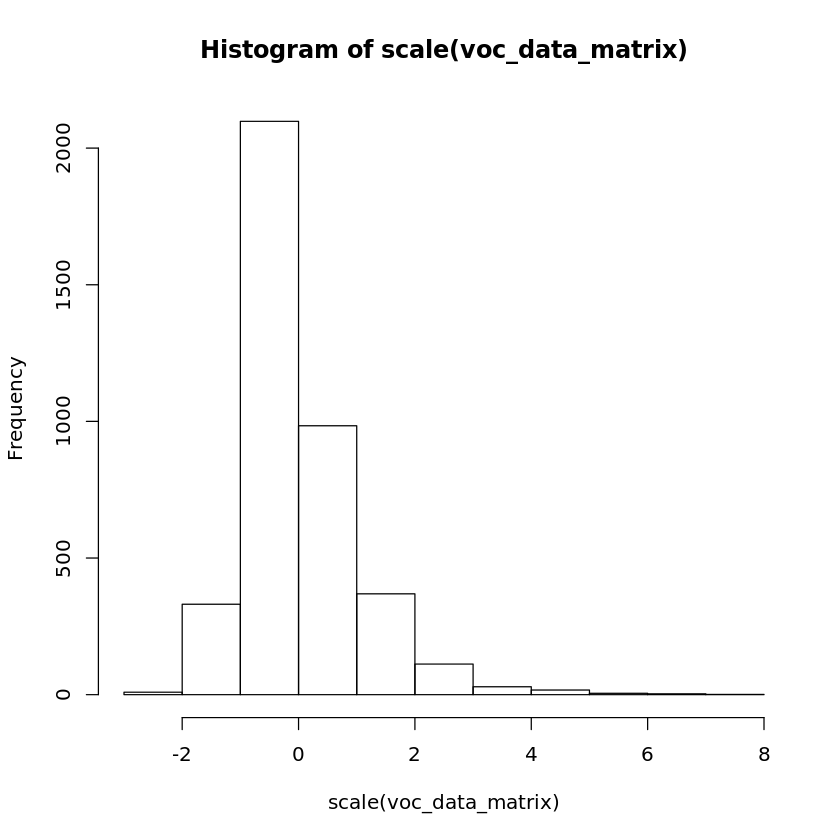

In [205]:
hist(scale(voc_data_matrix))

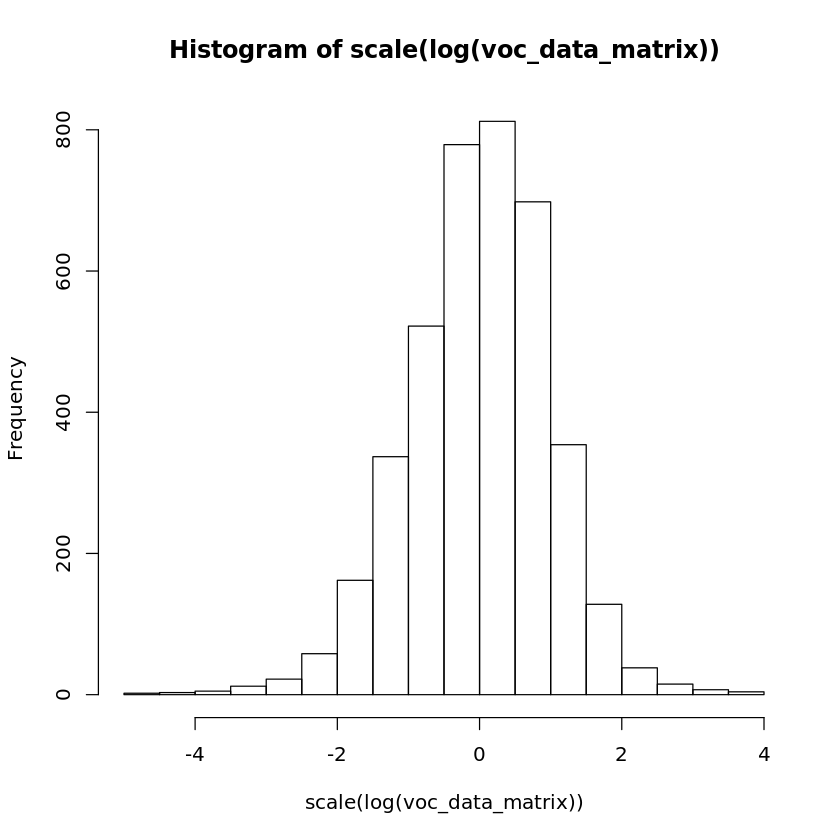

In [206]:
hist(scale(log(voc_data_matrix)))

* log transform will be a great transform

In [287]:
keep = which( voc_missing_rates <= 0.4 )
df_voc = data.frame( scale( log( voc_data_matrix ) ))
df_voc = df_voc[, keep]
voc_mets = colnames(df_voc)
df_voc$target = voc_ards

mean(df_voc$target)
df_censored_voc = df_voc 


[1] 0.4823529

In [288]:
df_censored_voc %>% head()

,X2,X3,X4,X5,X6,X7,X8,X10,X11,X12,⋯,X54,X55,X62,X63,X65,X67,X70,X72,X76,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
1,-0.3906628,-0.3027616,0.9491936,-2.4875405,-0.9161555,0.1192406,-1.044448,1.15941782,1.8136505,3.4533653,⋯,-1.36135635,0.1228236,0.2281753,-0.40376097,-0.6712266,-0.4220926,-0.3314348,-0.35529775,-0.9341625,0
2,-1.5994406,-0.7353219,-0.6231577,NA,-1.7648470,NA,NA,0.05303848,1.0768107,0.9937468,⋯,0.25574022,-1.6580931,0.9424507,0.76289145,0.2275590,1.2332147,NA,1.03040961,1.7416982,0
3,-0.3217503,1.1915769,0.1602434,NA,1.0831281,NA,1.887847,-0.08430686,-0.2118065,1.6352190,⋯,1.31708164,NA,0.8830397,0.41526010,-0.4165829,0.7228344,1.3415833,0.08210832,-0.2291860,0
4,0.4812412,0.5810687,-2.0608678,1.4678097,2.3590580,NA,2.402793,0.27005229,1.4583241,NA,⋯,0.46500473,NA,0.3184287,-0.08353452,-0.1274048,0.4445855,1.1712111,-0.07921629,NA,0
5,0.3662996,-3.0937831,-0.3262752,-0.4997417,NA,NA,-1.237748,NA,0.4733625,NA,⋯,0.06925654,0.8427929,-2.5277751,-0.49389589,-0.3576370,NA,0.7124369,NA,-2.7140640,0
6,-1.1786557,-1.2098771,-0.9549186,-2.6362438,-1.8468242,-1.5284166,NA,0.16451421,1.6218596,1.2506698,⋯,0.76601149,-1.1011915,0.2884261,-0.18891212,0.5214419,-0.3631326,-0.5715143,0.05098079,NA,0


In [289]:
voc_stage_1_impute_data = stage_1_impute_make_data(x_censored = df_censored_voc, y = df_censored_voc$target )
names(voc_stage_1_impute_data)

voc_x_naive_impute = data.frame( voc_stage_1_impute_data$x_naive_impute )
voc_x_naive_impute_with_y = voc_x_naive_impute
voc_x_naive_impute_with_y$target = df_censored_voc$target


[1] "N"                  "N_miss"             "N_var"             
 [4] "x_raw"              "x_naive_impute"     "N_use_impute"      
 [7] "x_use_impute"       "x_missing"          "x_missing_init"    
[10] "x_missing_init_raw" "x_is_missing"       "threshold"         
[13] "y"

In [290]:
#colnames(voc_x_naive_impute_with_y)
#voc_mets

In [291]:
voc_logistic_res = sapply( voc_mets, FUN=function(m) { apply_logistic_sim(m,voc_x_naive_impute_with_y,y_column = 'target') } )
voc_logistic_res_df = format_logistic_res(voc_logistic_res,voc_mets)

In [292]:
voc_logistic_res_df

Metabolite,Estimate,StdErr,Z,P-value,P.Bon,P.BH,SIG_BH,SIG_BON,SIG.RAW
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
X3,0.914706422,0.27552036,3.31992320,0.0009004221,0.03691731,0.03691731,TRUE,TRUE,TRUE
X70,-0.492061979,0.18841929,-2.61152659,0.0090138978,0.36956981,0.18478491,FALSE,FALSE,TRUE
X12,-0.325564431,0.13999074,-2.32561404,0.0200391498,0.82160514,0.21965824,FALSE,FALSE,TRUE
X6,-0.377655651,0.16417524,-2.30032044,0.0214300722,0.87863296,0.21965824,FALSE,FALSE,TRUE
X34,-0.365296414,0.19247812,-1.89785939,0.0577146067,1.00000000,0.40164323,FALSE,FALSE,FALSE
X50,-0.382542554,0.20980506,-1.82332380,0.0682543633,1.00000000,0.40164323,FALSE,FALSE,FALSE
X8,-0.289763938,0.15910419,-1.82122123,0.0685732341,1.00000000,0.40164323,FALSE,FALSE,FALSE
X23,-0.242019884,0.14614989,-1.65597036,0.0977278220,1.00000000,0.50085509,FALSE,FALSE,FALSE
X27,0.256640268,0.16202453,1.58395931,0.1132029799,1.00000000,0.51570246,FALSE,FALSE,FALSE


In [293]:
class(df_censored_voc)
dim(voc_mets)

[1] "data.frame"

NULL

In [294]:
voc_bayes_res = run_bayes_model(df_censored = df_censored_voc, metabolites = voc_mets, y_column = 'target')

[1] "CONTROL"
$adapt_delta
[1] 0.8

$max_treedepth
[1] 10

[1] "IMPUTING"
[1] 538


Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”


In [295]:
voc_stage_2_posterior = extract(voc_bayes_res$stage_2_fit)

mean( voc_stage_2_posterior$sigma_beta_x )
mean( voc_stage_2_posterior$nu_x )

voc_bayes_res_table = make_summary_table_beta( voc_bayes_res$stage_2_fit, metabolites = voc_mets )

voc_bayes_res_table = voc_bayes_res_table %>% mutate(SIG_BAYES=P_GT_LT_0 >= 0.975)
voc_merged_results = voc_bayes_res_table %>% inner_join(voc_logistic_res_df, by='Metabolite')
voc_merged_results

[1] 0.121632

[1] 19.86282

Warning message:
“Column `Metabolite` joining factor and character vector, coercing into character vector”


Metabolite,Param,mean,sd,X2.5.,X50.,X97.5.,Rhat,Z.x,P_GT_LT_0,SIG_BAYES,Estimate,StdErr,Z.y,P-value,P.Bon,P.BH,SIG_BH,SIG_BON,SIG.RAW
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
X3,beta_x[2],0.271690984,0.20585602,-0.02157329,0.238227245,0.77553366,1.0056203,1.31981070,0.96000,FALSE,0.914706422,0.27552036,3.31992320,0.0009004221,0.03691731,0.03691731,TRUE,TRUE,TRUE
X12,beta_x[10],-0.154076794,0.11807476,-0.42087609,-0.144268596,0.03862213,1.0032110,-1.30490884,0.92550,FALSE,-0.325564431,0.13999074,-2.32561404,0.0200391498,0.82160514,0.21965824,FALSE,FALSE,TRUE
X70,beta_x[39],-0.185272454,0.14995730,-0.52661489,-0.165562174,0.04549855,1.0065158,-1.23550143,0.91925,FALSE,-0.492061979,0.18841929,-2.61152659,0.0090138978,0.36956981,0.18478491,FALSE,FALSE,TRUE
X6,beta_x[5],-0.142874444,0.12084181,-0.41920387,-0.129334518,0.05659793,1.0021607,-1.18232626,0.90225,FALSE,-0.377655651,0.16417524,-2.30032044,0.0214300722,0.87863296,0.21965824,FALSE,FALSE,TRUE
X8,beta_x[7],-0.127621637,0.11023146,-0.37071775,-0.117640228,0.05400695,1.0009950,-1.15776058,0.88950,FALSE,-0.289763938,0.15910419,-1.82122123,0.0685732341,1.00000000,0.40164323,FALSE,FALSE,FALSE
X48,beta_x[30],-0.088471397,0.08405412,-0.26409491,-0.084386480,0.06381241,1.0012964,-1.05255272,0.85375,FALSE,-0.132416747,0.09707177,-1.36411180,0.1725323802,1.00000000,0.60464692,FALSE,FALSE,FALSE
X76,beta_x[41],-0.085347179,0.08744138,-0.27058196,-0.080283929,0.07186353,0.9999025,-0.97605026,0.84925,FALSE,-0.162355100,0.12025022,-1.35014389,0.1769698307,1.00000000,0.60464692,FALSE,FALSE,FALSE
X34,beta_x[22],-0.119640671,0.12450689,-0.40302177,-0.105390409,0.08524495,1.0014240,-0.96091605,0.84625,FALSE,-0.365296414,0.19247812,-1.89785939,0.0577146067,1.00000000,0.40164323,FALSE,FALSE,FALSE
X23,beta_x[15],-0.107591322,0.10858988,-0.34428521,-0.097512911,0.07503856,1.0028976,-0.99080428,0.84275,FALSE,-0.242019884,0.14614989,-1.65597036,0.0977278220,1.00000000,0.50085509,FALSE,FALSE,FALSE


In [296]:
gc_out_file = '/nfs/turbo/umms-cgillies/cgillies/RACE_CAPS/analysis/20200317_real_data_analysis/gc_cmp.csv'
write_csv(voc_merged_results, gc_out_file)